In [2]:
# Data manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

Exploratory Data Analysis

In [3]:
df1 = pd.read_csv("../../turnover.csv", engine = "python", encoding = "ISO-8859-1")

In [4]:
df1.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [5]:
df1.shape

(1129, 16)

In [6]:
df1.dtypes

stag            float64
event             int64
gender           object
age             float64
industry         object
profession       object
traffic          object
coach            object
head_gender      object
greywage         object
way              object
extraversion    float64
independ        float64
selfcontrol     float64
anxiety         float64
novator         float64
dtype: object

In [7]:
df1.isnull().sum()

stag            0
event           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
greywage        0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64

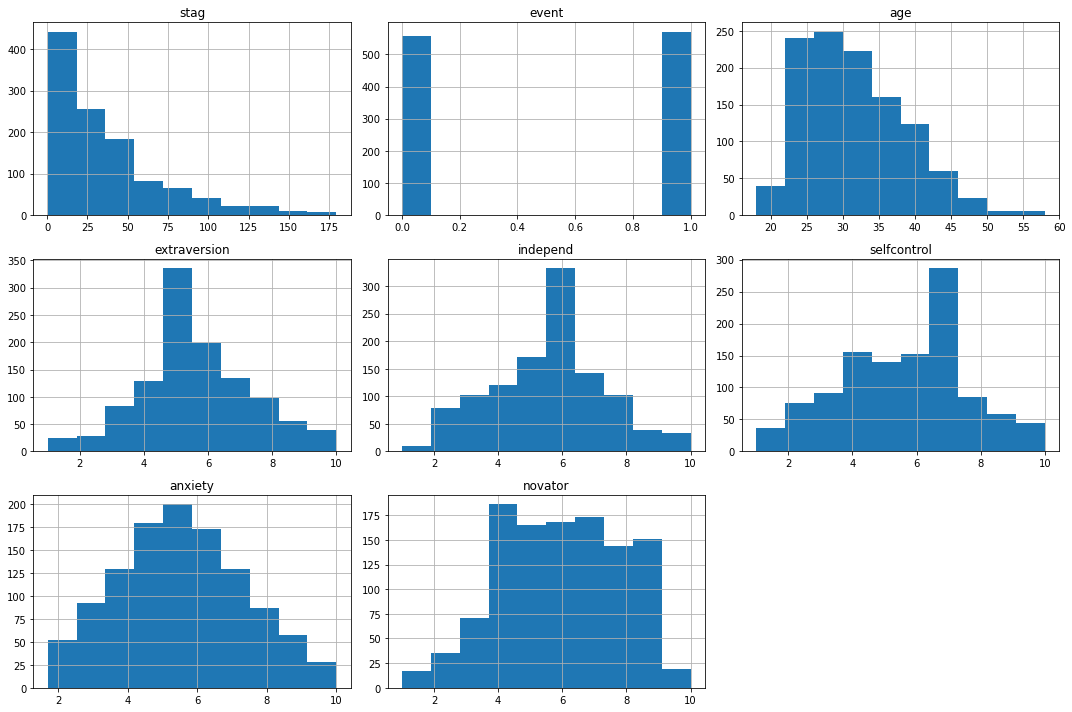

In [8]:
df1.hist(figsize=(15, 10))
plt.tight_layout()  # To avoid overlap of histograms
plt.show()

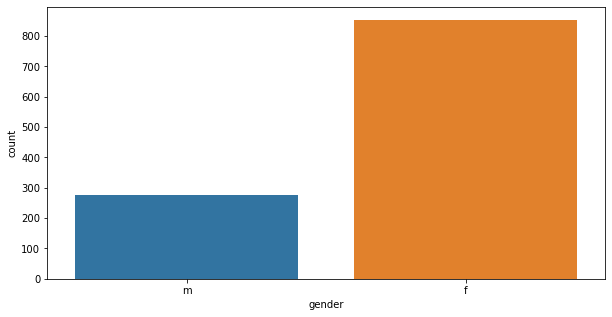

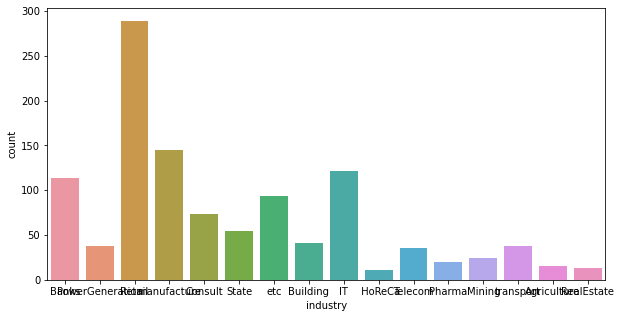

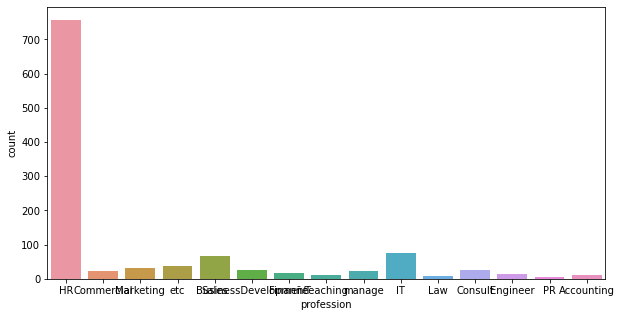

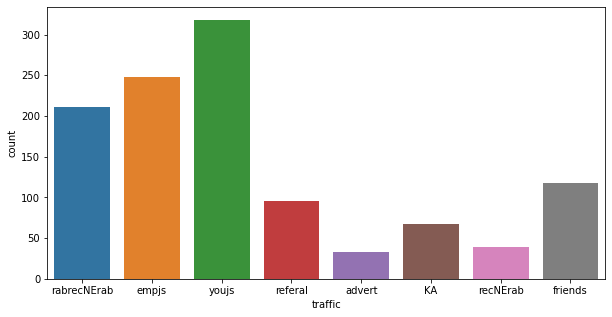

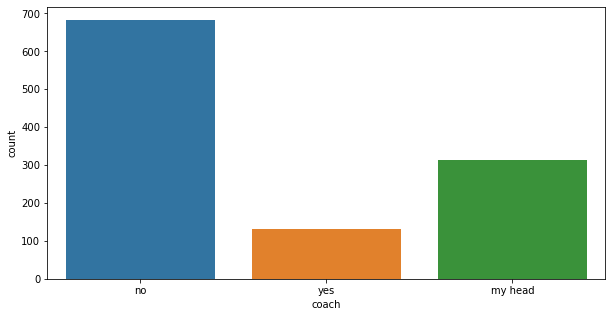

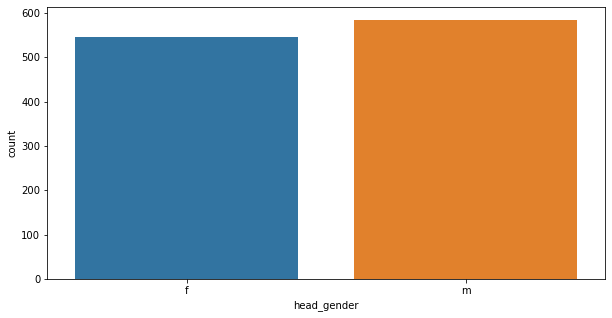

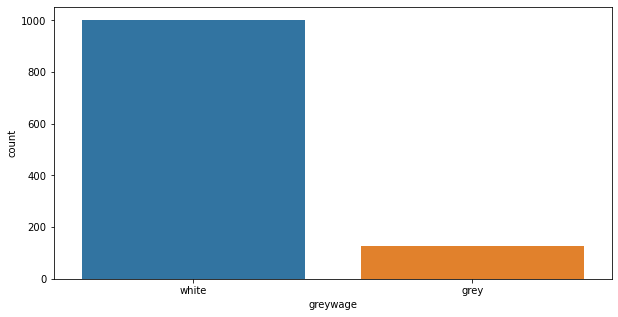

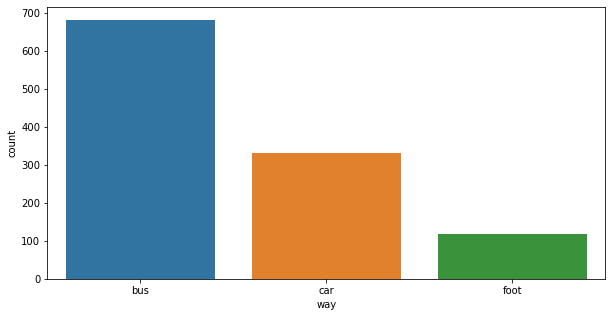

In [9]:
for col in df1.select_dtypes(include='object').columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df1, x=col)
    plt.show()

In [10]:
##Create years tenured variable instead of stag

In [11]:
df1['years_tenured'] = df1['stag'] / 12

In [12]:
df1.drop('stag', axis = 1, inplace = True)

In [13]:
df1.head()

,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator,years_tenured
0,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3,0.585900
1,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3,1.913758
2,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3,1.327858
3,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7,1.327858
4,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7,0.700890


In [14]:
##Create a binary coach variable (replaces "my head" with yes)

In [15]:
df1['coach'] = df1['coach'].replace('my head', 'yes')
df1.head()

,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator,years_tenured
0,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3,0.585900
1,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3,1.913758
2,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3,1.327858
3,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7,1.327858
4,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7,0.700890


Time for Preprocessing

In [16]:
X = df1.drop(columns='event')
y = df1.event

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [18]:
categorical_features = ['gender', 'industry', 'profession', 'traffic', 'head_gender', 'greywage', 'way', 'coach']
numerical_features = ['age', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator', 'years_tenured']

Encoding categorical variables

In [19]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

In [20]:
encoder.get_feature_names

<bound method OneHotEncoder.get_feature_names of OneHotEncoder(handle_unknown='ignore', sparse=False)>

In [21]:
X_train_cat = pd.DataFrame(columns=encoder.get_feature_names(categorical_features), data = X_train_encoded)

In [22]:
column_names = numerical_features + X_train_cat.columns.tolist()

Scaling the Data

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

In [24]:
X_train_ready = np.hstack([X_train_encoded, X_train_scaled])
X_test_ready = np.hstack([X_test_encoded, X_test_scaled])

Logistic Regression

In [25]:
logreg = LogisticRegression()
model_log = logreg.fit(X_train_ready, y_train)

In [26]:
print(model_log) 

LogisticRegression()


In [27]:
print("Coefficients: ", logreg.coef_)

Coefficients:  [[ 1.01403069e-01 -1.00711771e-01  1.53235859e-01  1.81048100e-01
   6.12424393e-01  6.80308617e-01  3.32542899e-01 -8.07341004e-01
   1.66288790e-02 -2.60065148e-02 -4.47404113e-01 -4.04837689e-01
  -9.23078405e-02 -2.34744408e-04 -1.48338908e-01  1.52613608e-01
  -7.64431673e-02 -1.25197076e-01 -2.99431772e-03 -3.31085186e-01
   8.00589990e-03  2.03103146e-01  1.79306659e-01 -9.52121311e-03
  -8.83251661e-01 -8.53898752e-01  7.97753495e-02 -6.09808587e-02
   8.49773883e-01 -3.18338455e-01  1.46050246e+00 -3.85234182e-01
   6.55285235e-02  1.31863170e-01 -8.64553361e-01  3.58403074e-01
  -4.10386960e-01  4.06082678e-01  6.54222744e-03  4.83399858e-01
  -1.10659388e-01 -1.30851600e-01  1.31542897e-01  7.94969177e-02
  -7.88056203e-02  1.25213826e-01  2.20893255e-01 -3.45415783e-01
   6.73865359e-02 -6.66952384e-02 -1.94542565e-01 -5.72940378e-02
   3.59657937e-02 -2.67876010e-02 -1.23185149e-01  4.51003119e-02
  -1.73184218e-01]]


In [28]:


# # assuming "features" is your DataFrame of feature values
# feature_names = df1.columns

# # get the coefficients from the model
# coefficients = logreg.coef_[0]

# # create a DataFrame that associates each feature with its coefficient
# coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# # display the DataFrame
# print(coeff_df)

Score the Logistic Regression

In [29]:
from sklearn.metrics import accuracy_score

y_pred_logreg = logreg.predict(X_test_ready)
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")

Accuracy: 0.668141592920354


Next Steps:
1. Next we want to try looking at feature importance, which we can do through a random forest model, random classification trees
    evaluate tradeoff between performance and complexity
2. Look at class imbalance: For instance, HR has a massive majority over the other fields. Try undersampling
3. Hyperparameter tuning
4. NEEED to make the coach variable binary
5. Need to do more advanced plots
6. Keep business problem in mind

Try Decision Tree instead!

In [30]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import sys
import matplotlib
matplotlib.use('Agg')
# matplotlib.pyplot.savefig('filename')

In [31]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree = dtree.fit(X_train_ready, y_train)
y_pred_dtree = dtree.predict(X_test_ready)
#ax = plt.subplots(figsize=(30,30))
fig = plt.figure()

 
# tree.plot_tree(dtree, 
#     feature_names=X_train_ready.columns,
#     class_names=np.uniqye(y).astype('str'),
#     filled=True)
# # plt.savefig("Decision_Tree")
# # sys.stdout.flush()

<Figure size 432x288 with 0 Axes>

In [32]:
print('Accuracy:', accuracy_score(y_test, y_pred_dtree))

Accuracy: 0.6371681415929203


Random Forest Time!

In [33]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
rfc = RandomForestClassifier(n_estimators=100, 
                             max_depth=None,
                             random_state=42)

#fit data

rfc.fit(X_train_ready, y_train)

y_pred_rfc = rfc.predict(X_test_ready)

In [34]:
from sklearn.metrics import recall_score, precision_score, f1_score
# accuracy
print('Accuracy:', accuracy_score(y_test, y_pred_rfc))

# recall
recall = recall_score(y_test, y_pred_rfc)
print('Recall:', recall)

# precision
precision = precision_score(y_test, y_pred_rfc)
print('Precision:', precision)

# f1 score
f1 = f1_score(y_test, y_pred_rfc)
print('F1 Score:', f1)

Accuracy: 0.7212389380530974
Recall: 0.6694915254237288
Precision: 0.7669902912621359
F1 Score: 0.7149321266968326


Out of all of the statistics, our precision was highest. Precision is all about the correctness of positive predictions made by your model. High precision indicates that your model is highly accurate when it predicts that an employee will churn. However, it might also mean your model is conservative and predicts churn only when it's highly certain, potentially missing out on several other employees who could churn (these would be false negatives, which affects recall, not precision).

Feature Importances

<AxesSubplot:>

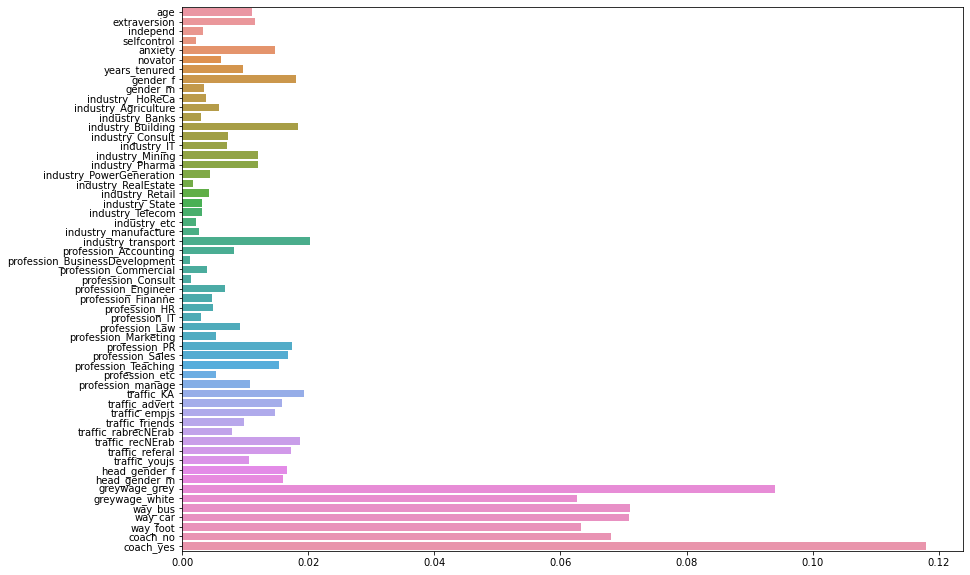

In [35]:
plt.figure(figsize=(14,10))
sns.barplot(y = column_names, x = rfc.feature_importances_)

Notes here:
1. Having a coach seems to be the most important variable, followed by your wage (unsurprisingly) and the type of commute you have.
2. In this dataset, being in real estate, consulting, or business development seems to have almost no effect on whether you will churn. 


Fine Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_ready, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters: ", best_params)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   48.1s


Best parameters:  {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:   50.0s finished


With best attributes

In [38]:
rfc = RandomForestClassifier(n_estimators=100, 
                             max_depth=20,
                             min_samples_leaf=2,
                             min_samples_split=5,
                             random_state=42)

#fit data

rfc.fit(X_train_ready, y_train)

y_pred_rfc = rfc.predict(X_test_ready)

# accuracy
print('Accuracy:', accuracy_score(y_test, y_pred_rfc))

# recall
recall = recall_score(y_test, y_pred_rfc)
print('Recall:', recall)

# precision
precision = precision_score(y_test, y_pred_rfc)
print('Precision:', precision)

# f1 score
f1 = f1_score(y_test, y_pred_rfc)
print('F1 Score:', f1)

Accuracy: 0.7300884955752213
Recall: 0.6949152542372882
Precision: 0.7663551401869159
F1 Score: 0.7288888888888889


In [41]:
print(rfc)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)


In [42]:
len(rfc.estimators_)

100

In [46]:
rfc.estimators_[0]

DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2,
                       min_samples_split=5, random_state=1608637542)

Plotting

TypeError: can only concatenate str (not "numpy.int64") to str

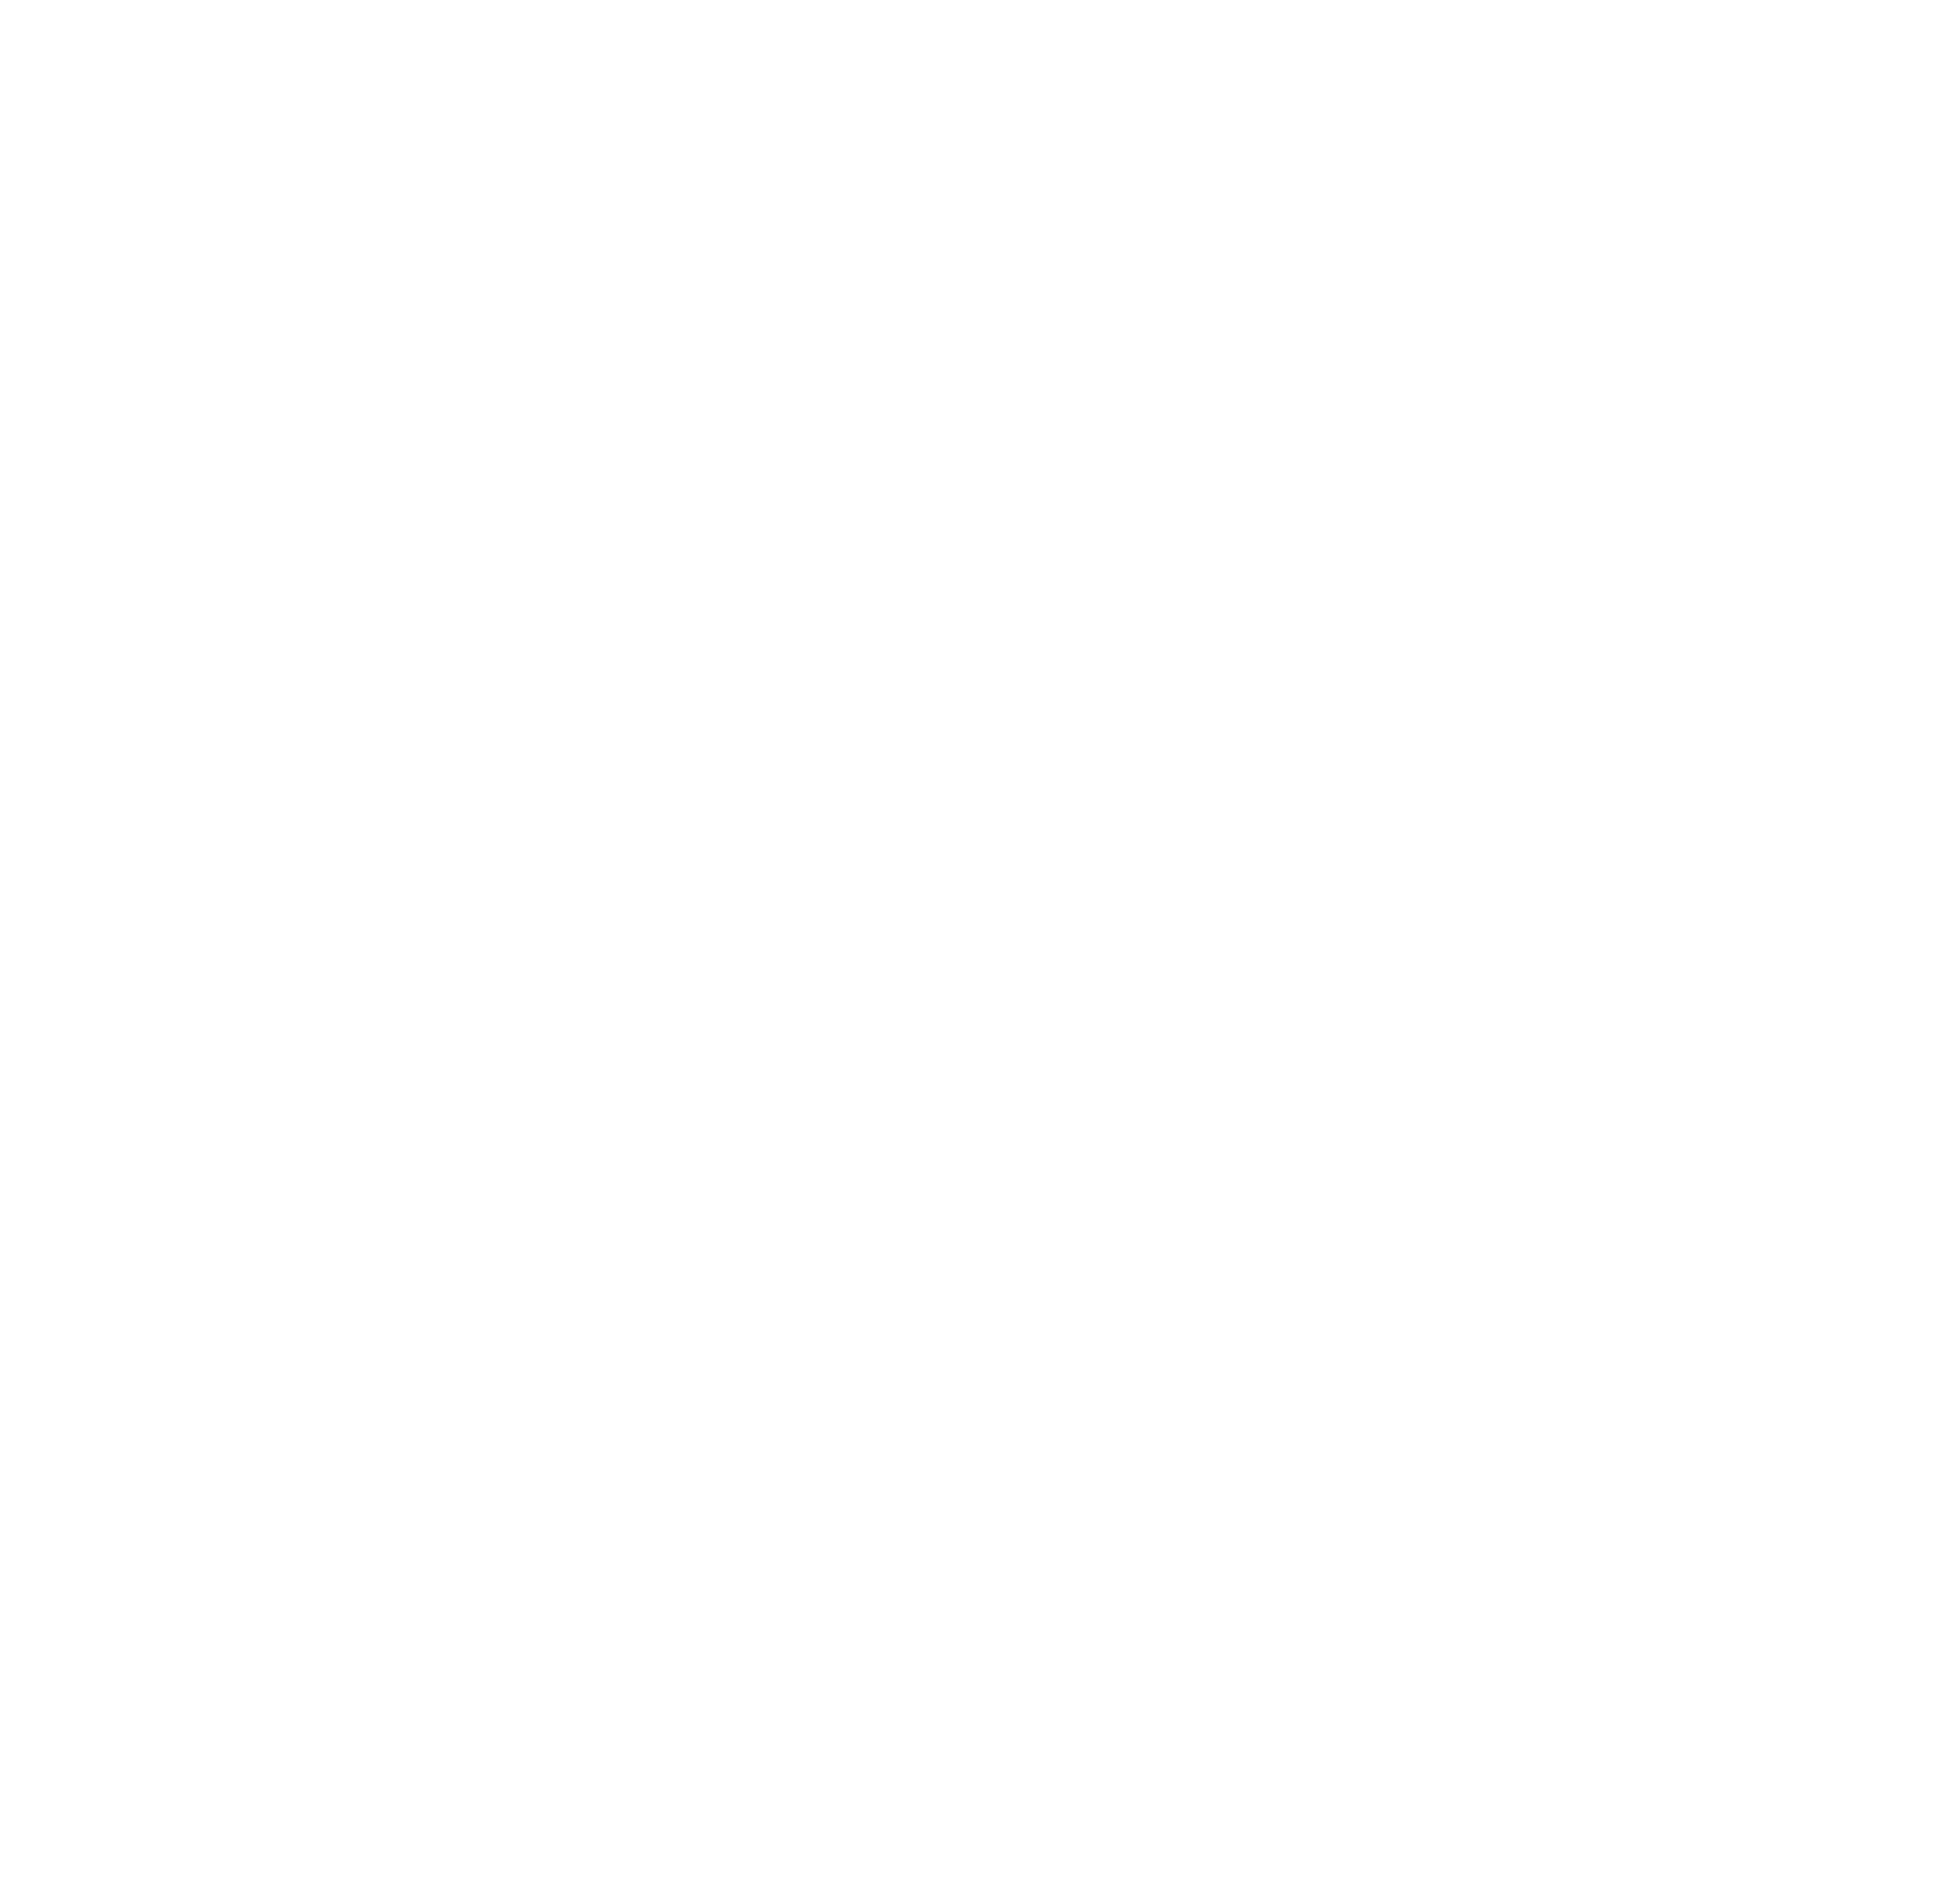

In [47]:
# estimator = rfc.estimators_[-1]
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfc.estimators_[0],
               feature_names = column_names, 
               class_names=y.unique(),
               filled = True);